# Sleep Final Data Prep


In [1]:
%matplotlib inline

In [ ]:
import datetime as dt
import itertools
import pandas as pd

import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import synapseclient
from synapseclient import Activity, Schema, Table, as_table_columns

InteractiveShell.ast_node_interactivity = 'all'
syn = synapseclient.Synapse()
syn.login()

def isnum(x):
    if x is None:
        return False
    try:
        float(x)
        return True
    except ValueError:
        return False

### Data load, rename, combine

In [ ]:
v1sid, v2sid = 'syn12181340', 'syn12181349'

v1r = pd.read_csv(syn.get(v1sid).path, parse_dates=['timestamp'])
v2r = pd.read_csv(syn.get(v2sid).path, parse_dates=['timestamp'])

v1r.head()
v2r.head()

In [ ]:
v1 = v1r.drop(columns=['userid', 'timestampUTC']).rename(columns={
    'brightenid':'participant_id',
    'timestamp':'dt_response'
})

v2 = v2r.rename(columns={
    'userid':'participant_id',
    'timestamp':'dt_response'
})

combined = pd.concat([v1, v2], sort=False)
combined.head()

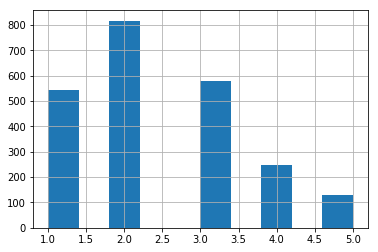

In [5]:
combined.sleep_1.hist()

### Set provenance and upload to Synapse

In [ ]:
final = syn.store(Table(
    Schema(
            name='Sleep',
            columns=as_table_columns(combined), 
            parent='syn10848316'),
        combined
    )
)

In [ ]:
final = syn.setProvenance(
    'syn17022659',
    activity=Activity(
        name='Combine V1 and V2 data',
        description='Process and combine the data collected during study 1 and study 2',
        used=[v1sid, v2sid],
        executed=[
            dict(
                name='IPython Notebook',
                url='https://github.com/apratap/BRIGHTEN-Data-Release/blob/master/Create_Sleep_datafiles.ipynb'
            )
        ]
    )
)